In [301]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking')
import track_reconstruction as tr
from track import *
from tqdm import tqdm
from track3D import Track3D

# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##




In [302]:
# Check that a is tofpet on the x side of the calorimeter
def is_sidex(a):
   """ 
   Checks if the integer given is on the x-side (returns 1). If it isn't, it returns 0. 
   """
  
   if(a==0 or a==1 or a==4 or a==5):
          return 1  #is on the x side
   else:
          return 0  #not on the x side
    
# Determine the (X,Z) or (Y,Z) coordinate of a hits, depending on what tofpet_id is entered. Triplet=[channel,t_id,layer]
def Mapping2D(t_id,channel):
   """
   Determine the (X,Z) or (Y,Z) coordinate of a hits, depending on what tofpet_id is entered. 
   It returns the mapping of the hit 
   """
   
   mapping=[[  [10 , 3], [22 , 3], [ 3 , 3], [15 , 3], [ 9 , 3], [21 , 3], [ 4 , 3], [16 , 3], [ 8 , 3], [20 , 3], [ 5 , 3], [17 , 3], [ 7 , 3], [19 , 3], [ 6 , 3], [18 , 3], [ 7 , 2], [24 , 2], [ 1 , 2], [13 , 2], [ 8 , 2], [23 , 2], [ 2 , 2], [14 , 2], [ 9 , 2], [22 , 2], [ 3 , 2], [15 , 2], [10 , 2], [21 , 2], [ 4 , 2], [16 , 2], [11 , 2], [20 , 2], [ 5 , 2], [17 , 2], [12 , 2], [19 , 2], [ 6 , 2], [18  ,2], [ 7 , 1], [24 , 1], [ 1 , 1], [13 , 1], [ 8 , 1], [23 , 1], [ 2 , 1], [14 , 1], [ 9 , 1], [22 , 1], [ 3 , 1], [15 , 1], [10 , 1], [21 , 1], [ 4 , 1], [16 , 1], [11  ,1], [20 , 1], [ 5 , 1], [17 , 1], [12 , 1], [19 , 1], [ 6 , 1], [18 , 1],[ 7,  4], [24,  4], [ 1,  4], [13,  4], [ 8,  4], [23,  4], [ 2,  4], [14,  4], [ 9,  4], [22,  4], [ 3,  4], [15,  4], [10,  4], [21,  4], [ 4,  4], [16,  4], [11,  4], [20,  4], [ 5,  4], [17,  4], [12,  4], [19,  4], [ 6,  4], [18,  4], [12,  3], [24,  3], [ 1,  3], [13,  3], [11,  3], [23,  3], [ 2,  3], [14,  3]],[[10,  7], [22,  7], [ 3,  7], [15,  7], [ 9,  7], [21,  7], [ 4,  7], [16,  7], [ 8,  7], [20,  7], [ 5,  7], [17,  7], [ 7,  7], [19,  7], [ 6,  7], [18,  7], [ 7,  6], [24,  6], [ 1,  6], [13,  6], [ 8,  6], [23,  6], [ 2,  6], [14,  6], [ 9,  6], [22,  6], [ 3,  6], [15,  6], [10 , 6], [21,  6], [ 4,  6], [16,  6], [11,  6], [20,  6], [ 5,  6], [17,  6], [12,  6], [19,  6], [ 6,  6], [18,  6], [ 7,  5], [24,  5], [ 1,  5], [13,  5], [ 8,  5], [23,  5], [ 2,  5], [14,  5], [ 9,  5], [22,  5], [ 3,  5], [15,  5], [10,  5], [21,  5], [ 4,  5], [16 , 5], [11,  5], [20,  5], [ 5,  5], [17,  5], [12,  5], [19,  5], [ 6,  5], [18,  5],[ 7 , 8], [24 , 8], [ 1 , 8], [13 , 8], [ 8 , 8], [23 , 8], [ 2 , 8], [14 , 8], [ 9 , 8], [22 , 8], [ 3 , 8], [15 , 8], [10,  8], [21 , 8], [ 4 , 8], [16 , 8], [11 , 8], [20 , 8], [ 5 , 8], [17 , 8], [12 , 8], [19 , 8], [ 6 , 8], [18 , 8], [12 , 7], [24 , 7], [ 1 , 7], [13 , 7], [11 , 7], [23 , 7], [ 2 , 7], [14 , 7]]] ##
   if is_sidex(t_id):
       return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]
   else:
       t_id=t_id-2
       return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]
   
# findneighbours(center, candidates)
def findneighbours(center, candidates):
    neighbours = []
    for i in range(len(candidates)):
        for shift in [-1,1]:
            if candidates[i] == [center[0],center[1]+shift] or candidates[i] == [center[0]+shift, center[1]]:  #center[0] - X coordinate and center[1] - Z coordinate
                neighbours.append(candidates[i])
    return neighbours


def plot_cluster(cluster, n_layers, n_strips):
    map = np.zeros((n_layers, n_strips))

    for coord in cluster:
        map[int(coord[1] - 1), int(coord[0] - 1)] = 1


#filter to find good cluster
def good_cluster(track, center):
    filter_track=[]
    if not track.is_good_2D_fit():
     if number_neighbors(center)>=3:
         return True
     else :
         return False 
    

#Count number neighbors

def number_neighbors(candidates, center):
    neighbours=[]
    for i in range(len(candidates)):
        for shift in [-1,1]:
            if candidates[i] == [center[0],center[1]+shift] or candidates[i] == [center[0]+shift, center[1]]:  #center[0] - X coordinate and center[1] - Z coordinate
                neighbours.append(candidates[i])
    return len(neighbours)


def create_tracks(df, plot = False):
    tracks = []
    #nb_events = len(df['n_hits'])
    #steps = 9
    #buff_start = None
    #buff_evt_idx = None
    dts = []
    for index, row in tqdm(df.iterrows(), total = df.shape[0]):
        channels = row['tofpet_channel']
        tofpet_id = row['tofpet_id']
        hits = [Hit(row,i) for i in range(row['n_hits'])]
        hitsX = [h for h in hits if h.is_sidex]
        hitsY = [h for h in hits if not h.is_sidex]
        
        ## Some events don't have three hits on one of the two sides and are thus not considered
        if len(hitsX) > 3 and len(hitsY) > 3:
            # get track parameters
            track = Track3D(hits)
            tracks.append(track)

            ## check if track has a "good" chi2 value
            if track.is_good_2D_fit():
            
                # worth making a precise track
                #track.precise_track()
                
                ## compute the time of the track
                dt = track.get_time_interval()
                if dt is not None:
                    dts.append(dt)


    return tracks, dts

In [303]:
### DATA LOADING 

file_path = r'C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\run_000011\data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree='event_data;1'  #what tree to get the info from in the ROOT file 
evt_tree='event_data;1'

# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'evt_flags']                  #br= branch name that we want to store 

with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")  #open files, extracts data form the [...] and stores them into dictionaries ..._dict
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")    # created with array method, extracts specified branch names and stores in numpy arrays

# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')  #The .query() method is a way to filter data within a DataFrame based on a specified condition. Here would filter df_hits to only include DataFrame with more than 3 hits
df_hits = pd.DataFrame.from_dict(hits_dict)   #converts dictinaries into pandas DataFrames to facilitate data analysis
df_evts = pd.DataFrame.from_dict(evts_dict)

#df_hits  #to print the info

In [304]:
#FILTERING DATA WE WANT

df_hits['timestamp_global'] = df_evts['timestamp']  #adds column to df_hits with values from df_evts
df_hits.query('n_hits > 15', inplace=True)  #filters df_hits to only keep rows with number of hits >2. inplace=True means that the DataFrame is modified in place, so the original DataFrame df_hits is updated to only contain rows meeting the condition. If inplace=False or omitted, returns a new DataFrame with the filtered results without modifying the original df_hits.
df_hits.query('n_hits < 17', inplace= True)

df_hits
#len(df_hits)


,n_hits,tofpet_id,tofpet_channel,timestamp,t_coarse,t_fine,v_coarse,v_fine,value,timestamp_global
0,16,"[0, 1, 4, 0, 2, 5, 6, 4, 3, 4, 7, 6, 0, 7, 3, 2]","[12, 32, 12, 40, 47, 54, 36, 16, 35, 40, 52, 4...","[0.4989964, 0.6236513, 1.005709, 0.6354124, 0....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[278, 246, 190, 253, 217, 308, 242, 286, 274, ...","[38, 36, 48, 42, 40, 37, 36, 38, 32, 44, 38, 3...","[47, 63, 45, 43, 47, 49, 46, 47, 53, 50, 45, 4...","[1.2434554, -0.8204824, -2.7037287, -4.6503053...","[0.4989964, 0.6236513, 1.005709, 0.6354124, 0...."
2,16,"[1, 4, 5, 5, 1, 3, 1, 2, 6, 6, 7, 6, 6, 4, 3, 3]","[45, 27, 40, 56, 57, 45, 61, 1, 9, 33, 53, 53,...","[0.96735424, 0.7653423, 0.92625076, 0.818104, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[199, 231, 201, 216, 347, 290, 236, 257, 283, ...","[40, 48, 46, 38, 35, 32, 38, 38, 36, 38, 37, 3...","[53, 51, 53, 59, 52, 60, 50, 55, 56, 47, 45, 5...","[1.1892524, 1.9031334, 3.8873699, 1.5834945, 0...","[0.96735424, 0.7653423, 0.92625076, 0.818104, ..."
3,17,"[6, 1, 3, 2, 0, 2, 5, 4, 6, 2, 4, 4, 2, 0, 6, ...","[48, 32, 40, 4, 12, 44, 32, 40, 24, 24, 16, 12...","[0.46329066, 0.31418195, 0.4207808, 0.81047726...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[277, 293, 296, 227, 288, 208, 219, 255, 237, ...","[36, 35, 36, 40, 38, 38, 44, 44, 34, 44, 37, 4...","[53, 60, 56, 56, 47, 54, 48, 48, 54, 55, 45, 4...","[-0.562156, 1.4808147, -1.5761762, -0.75141233...","[0.46329066, 0.31418195, 0.4207808, 0.81047726..."
4,16,"[4, 4, 0, 0, 5, 6, 6, 5, 1, 0, 7, 3, 2, 2, 6, 2]","[47, 19, 3, 27, 52, 57, 9, 59, 39, 55, 49, 53,...","[0.84910274, 0.76163286, 0.8755943, 0.878864, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]","[217, 235, 226, 213, 255, 287, 314, 342, 360, ...","[52, 46, 36, 40, 48, 38, 36, 39, 39, 38, 44, 3...","[63, 50, 53, 54, 48, 45, 52, 48, 53, 54, 47, 5...","[-0.65353876, -1.6212033, 0.5734622, -0.272599...","[0.84910274, 0.76163286, 0.8755943, 0.878864, ..."
5,16,"[4, 2, 7, 2, 1, 4, 3, 0, 0, 2, 5, 0, 6, 6, 4, 6]","[26, 12, 50, 16, 46, 2, 54, 10, 58, 40, 38, 34...","[0.75877696, 0.8758026, 0.7888641, 0.9195324, ...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[228, 221, 222, 202, 198, 195, 209, 272, 304, ...","[52, 34, 38, 38, 40, 40, 42, 48, 31, 40, 43, 3...","[49, 52, 49, 47, 50, 47, 52, 53, 47, 45, 47, 5...","[2.7704349, -1.6245046, 1.5879142, 0.014019844...","[0.75877696, 0.8758026, 0.7888641, 0.9195324, ..."
...,...,...,...,...,...,...,...,...,...,...
215588,18,"[7, 6, 5, 4, 0, 4, 3, 2, 1, 0, 6, 2, 5, 6, 7, ...","[56, 32, 44, 47, 7, 36, 44, 24, 43, 35, 56, 0,...","[0.70112294, 0.7474475, 0.626171, 0.7635201, 0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...","[240, 215, 257, 231, 230, 196, 207, 221, 208, ...","[44, 36, 38, 52, 40, 40, 36, 44, 42, 34, 36, 4...","[42, 47, 57, 63, 51, 47, 46, 53, 51, 50, 45, 4...","[0.15703186, -0.58245885, 0.57848346, -1.02467...","[0.70112294, 0.7474475, 0.626171, 0.7635201, 0..."
215591,16,"[1, 4, 4, 0, 2, 6, 0, 2, 3, 4, 5, 6, 7, 0, 2, 7]","[46, 54, 2, 34, 1, 21, 6, 53, 37, 26, 42, 45, ...","[0.86681724, 0.96051574, 0.90058845, 1.4672469...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[209, 195, 216, 283, 260, 231, 275, 261, 319, ...","[40, 46, 40, 32, 38, 38, 34, 36, 34, 52, 35, 3...","[52, 54, 47, 62, 55, 45, 50, 57, 47, 47, 59, 5...","[1.4814038, 1.0851073, -0.7248064, -2.0318995,...","[0.86681724, 0.96051574, 0.90058845, 1.4672469..."
215592,19,"[4, 4, 1, 3, 2, 1, 4, 6, 4, 3, 2, 0, 0, 7, 6, ...","[56, 28, 56, 56, 24, 52, 0, 29, 40, 43, 62, 19...","[0.39614266, 0.5849952, 0.5458909, 0.7642352, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[284, 262, 256, 225, 232, 244, 297, 199, 202, ...","[37, 48, 40, 38, 44, 48, 44, 36, 44, 38, 40, 3...","[50, 56, 58, 52, 56, 53, 51, 50, 45, 58, 47, 4...","[7.4929137, -0.40232238, 0.47482017, 0.2811115...","[0.39614266, 0.5849952, 0.5458909, 0.7642352, ..."
215594,16,"[0, 0, 1, 3, 2, 4, 6, 6, 1, 4, 4, 6, 4, 0, 7, 2]","[10, 34

In [305]:
# testing individual outputs
#good_tracks = [t for t in tracks if t.is_good_2D_fit()]
#i = np.random.randint(0, len(tracks))
#print('####### Track # {}'.format(i))
#t = tracks[i]
#t.print(True)
## t.precise_track()
## print('after')
## t.print(True)

In [306]:
#faire une boucle sur tout les df_hits pour recuperer que ceux qui sont bons 
#
# getting tracks
#tracks, dts = create_tracks(df_hits.head(1000))
#df_filtered = df_hits[df_hits.apply(lambda row: good_cluster(row, n_hits[0]), axis=1)]


coord=df_hits.iloc[np.random.randint(0, len(df_hits))]   #stores the first row of df_hits into the variable 'coord'. To access individual values within this row using the column names or positions (coord['column_name'] or coord[0] to access the first column of that row)
coord


n_hits                                                             16
tofpet_id            [4, 5, 5, 3, 4, 1, 0, 6, 2, 1, 0, 7, 6, 2, 2, 6]
tofpet_channel      [56, 48, 60, 53, 32, 60, 32, 33, 13, 48, 56, 4...
timestamp           [0.8386417, 0.98605716, 0.77621275, 1.4383801,...
t_coarse             [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]
t_fine              [222, 196, 222, 290, 339, 319, 335, 258, 287, ...
v_coarse            [38, 38, 38, 36, 47, 36, 39, 38, 38, 39, 33, 4...
v_fine              [46, 52, 57, 49, 50, 62, 48, 45, 55, 48, 40, 4...
value               [-1.7449076, -1.660496, 0.35441554, -1.2558184...
timestamp_global    [0.8386417, 0.98605716, 0.77621275, 1.4383801,...
Name: 142784, dtype: object

In [307]:
tofpet_iD=coord[1]
tofpet_channeL=coord[2]
print(tofpet_iD)
print(tofpet_channeL)

[4 5 5 3 4 1 0 6 2 1 0 7 6 2 2 6]
[56 48 60 53 32 60 32 33 13 48 56 49 57 37 61  9]


C:\Users\kimyk\AppData\Local\Temp\ipykernel_3868\1481942101.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tofpet_iD=coord[1]
C:\Users\kimyk\AppData\Local\Temp\ipykernel_3868\1481942101.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tofpet_channeL=coord[2]


In [308]:
l=len(tofpet_iD)   #number of events (i - number starting from 0)
pts_x=[] #initialising a set(list) for coordinates (X,Z), pts=points
pts_y=[] #initialising a set(list) for coordinates (Y,Z)
for i in range(l):
    if is_sidex(tofpet_iD[i]):
         pts_x.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (X,Z)
    else:
         pts_y.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (Y,Z)
    
print(pts_x)
print(pts_y)    
    

[[11, 5], [11, 8], [11, 7], [11, 6], [11, 3], [11, 2], [11, 4], [11, 1]]
[[19, 4], [20, 6], [19, 3], [20, 8], [20, 5], [19, 2], [19, 1], [20, 7]]


In [309]:
print(pts_x) 

[[11, 5], [11, 8], [11, 7], [11, 6], [11, 3], [11, 2], [11, 4], [11, 1]]


<Figure size 640x480 with 0 Axes>

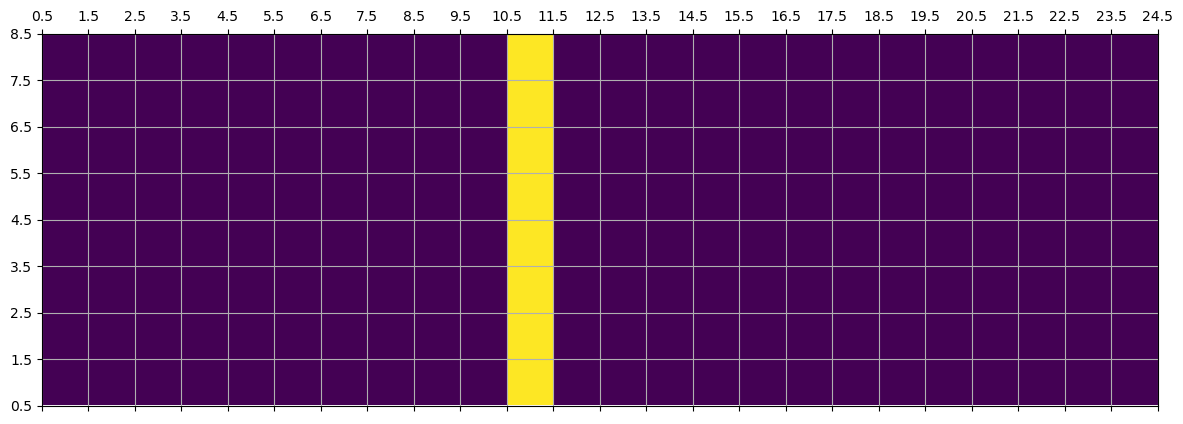

<Figure size 640x480 with 0 Axes>

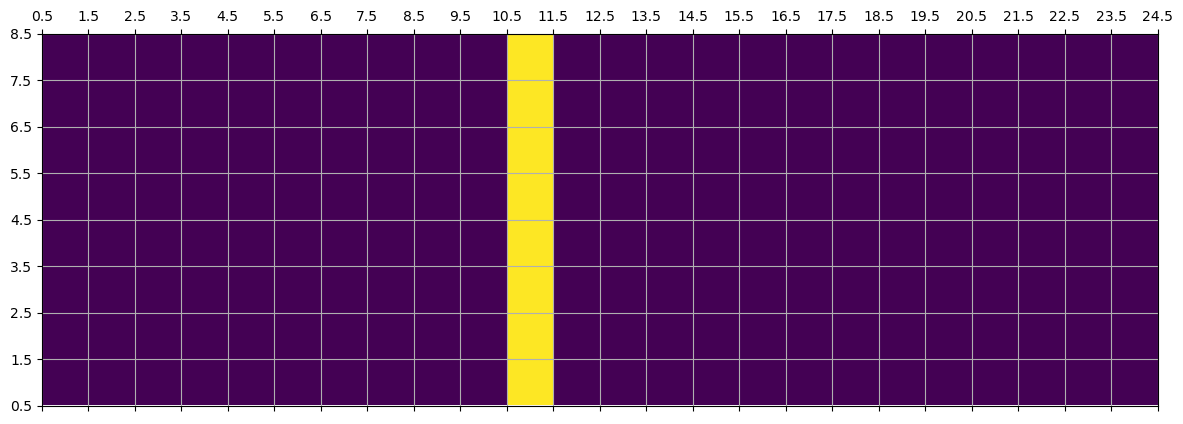

In [310]:
n_layers = 8
n_strips = 24
map = np.zeros((8,24))
for coord in pts_x:    #Je crois ça prend les coordonnée de chaque hit de notre liste, et indique sur la carte avec un 1 au lieu de 0
    map[int(coord[1]-1),int(coord[0]-1)]=1

plt.figure()
plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])
plt.grid()
plt.gca().set_xticks(np.arange(0.5, n_strips + 1))
plt.gca().set_yticks(np.arange(0.5, n_layers + 1))
#plt.gca().xaxis.tick_top()  # Placer les étiquettes des axes en haut
plt.show()

n_layers = 8
n_strips = 24
map = np.zeros((8,24))
for coord in pts_x:    #Je crois ça prend les coordonnée de chaque hit de notre liste, et indique sur la carte avec un 1 au lieu de 0
    map[int(coord[1]-1),int(coord[0]-1)]=1

plt.figure()
plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])
plt.grid()
plt.gca().set_xticks(np.arange(0.5, n_strips + 1))
plt.gca().set_yticks(np.arange(0.5, n_layers + 1))
#plt.gca().xaxis.tick_top()  # Placer les étiquettes des axes en haut
plt.show()

In [311]:
# hits=[]
# hits.append(pts_x)
# while len(hits)!=0:
#   cluster=[]
#   rootpoint=hits[0]
#   cluster.append(rootpoint)
#   hits.remove(rootpoint)
#   neighbours=[]
hits = []
hits += pts_x #+= this is hits = hits + pts_x
# rootpoint = hits[0]
# print(rootpoint)
cluster_list=[]
while len(hits) != 0:   #we go through every hit 
    cluster = []
    rootpoint = hits[0]
    cluster.append(rootpoint)     #cluster contains the first hit, then the rootpoint is removed from the hit list
    hits.remove(rootpoint)
    
    neighbours = []                  
    neighbours = findneighbours(rootpoint, hits)   #we look for the neighbors of the rootpoint
    
    while len(neighbours)!=0:          #as long as the neighbor list isn't empty, keeps going

        newcenter = neighbours[0]    #first neighbor is the new center so added to cluster list
        cluster.append(newcenter)
        neighbours.remove(newcenter)   #this point is removed from the hit and neighbor list
        hits.remove(newcenter)
        neighbours = neighbours + findneighbours(newcenter,hits) #no need bc we have to remove neighb of neighb from hits
   
    cluster_list.append(cluster)   
#   newcenter_neighbours=findneighbours(newcenter, hits)
#         hits.remove(newcenter_neighbours)
#         neighbours.append(newcenter_neighbours) 
        
#     if len(neighbours) == 0:
#         cluster.remove(rootpoint)
#     else:
#         cluster.append(neighbours)



    
    #if len(cluster)>1:
      #print(len(cluster))
      #print(cluster) 
      # 
for item in cluster :
    print(item, '\n')

print(cluster, '\n', cluster_list)

[11, 5] 

[11, 6] 

[11, 4] 

[11, 7] 

[11, 3] 

[11, 8] 

[11, 2] 

[11, 1] 

[[11, 5], [11, 6], [11, 4], [11, 7], [11, 3], [11, 8], [11, 2], [11, 1]] 
 [[[11, 5], [11, 6], [11, 4], [11, 7], [11, 3], [11, 8], [11, 2], [11, 1]]]


<Figure size 640x480 with 0 Axes>

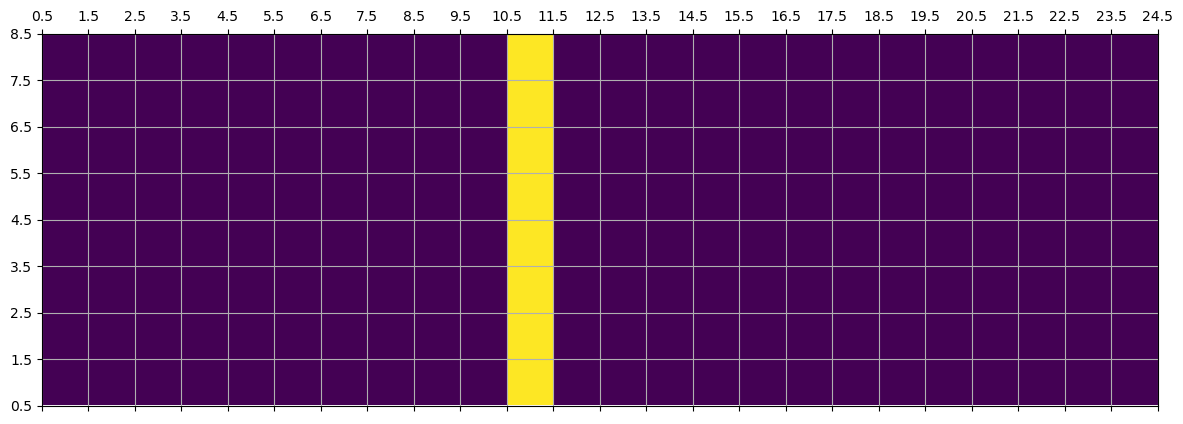

In [312]:
n_layers = 8
n_strips = 24
map = np.zeros((8,24))
for cluster in cluster_list:    #Je crois ça prend les coordonnée de chaque hit de notre liste, et indique sur la carte avec un 1 au lieu de 0
    for coord in cluster: 
     map[int(coord[1]-1),int(coord[0]-1)]=1

plt.figure()
plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])
plt.grid()
plt.gca().set_xticks(np.arange(0.5, n_strips + 1))
plt.gca().set_yticks(np.arange(0.5, n_layers + 1))
#plt.gca().xaxis.tick_top()  # Placer les étiquettes des axes en haut
plt.show()

#plot_cluster(cluster, 8,24)

In [313]:
test1 = [[5,3],[2,3],[1,2]]
test2 = [[2,2],[1,3],[2,1]]
test1 = test1+test2
print(test1)

[[5, 3], [2, 3], [1, 2], [2, 2], [1, 3], [2, 1]]


In [314]:
# findneighbours(pts_x[-1],pts_x)

In [315]:
pts_test=[[1,2],[1,0],[0,1],[4,1]]   #test of findneighbours function
centerpoint=[1,1]
findneighbours(centerpoint,pts_test)

[[1, 2], [1, 0], [0, 1]]

In [316]:
class clusters:
    def __init__(self,points):
        self.pts=points
        self.l=len(points)
    
    #a ajouter une fonction energie qui calcule l'energie totale du cluster (additioner energie des points)
    #peut etre une focntion distribution spatiale (ecart type et moyenne du cluster)
    # a verifier si le cluster n'est pas a bord du detecteur pour eviter qu'il soit tronqué 
    #afficher le cluster comme dans le rapport

In [317]:
hits=[]
hits+=pts_x
outlist=[]
while len(hits)!=0:
    cluster=[]
    rootpoint=hits[0]
    cluster.append(rootpoint)
    hits.remove(rootpoint)
    neighbours=[]
    neighbours+=findneighbours(rootpoint,hits)
    #cluster+=neighbours
    #hits=del_list(hits,neighbours)
    while len(neighbours)!=0:
        newcenter=neighbours[0]
        hits.remove(newcenter)
        neighbours.remove(newcenter)
        cluster.append(newcenter)
        neighbours+=findneighbours(newcenter,hits)
    
    if len(cluster)>1:
        x=clusters(cluster)
        outlist.append(x)
    

In [318]:
for i in range(len(outlist)):
    print(outlist[i].pts)

[[11, 5], [11, 6], [11, 4], [11, 7], [11, 3], [11, 8], [11, 2], [11, 1]]


In [319]:
print(outlist[0].pts)

[[11, 5], [11, 6], [11, 4], [11, 7], [11, 3], [11, 8], [11, 2], [11, 1]]


In [320]:
n_layers = 8
n_strips = 24
map = np.zeros((8,24))
for i in range(len(outlist)):
    print(outlist[i].pts)
    coord[i]=outlist[i].pts
    map[int(coord[1]-1),int(coord[0]-1)]=1
plt.figure()
plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])
plt.grid()
plt.gca().set_xticks(np.arange(0.5, n_strips + 1))
plt.gca().set_yticks(np.arange(0.5, n_layers + 1))
#plt.gca().xaxis.tick_top()  # Placer les étiquettes des axes en haut


[[11, 5], [11, 6], [11, 4], [11, 7], [11, 3], [11, 8], [11, 2], [11, 1]]


TypeError: unsupported operand type(s) for -: 'list' and 'int'